In [2]:
import numpy as np
import matplotlib.pyplot as plt

def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

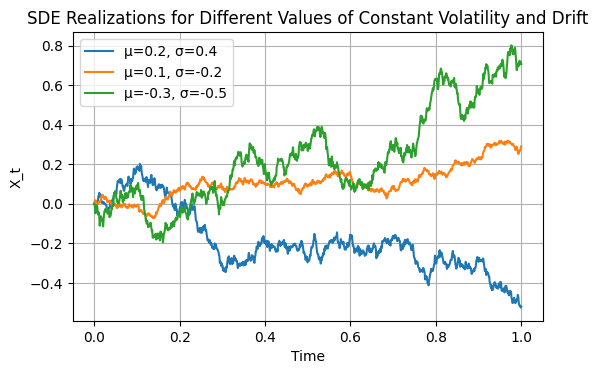

In [22]:
# Parameters
mu_values = [0.2, 0.1,-0.3]  # Different drift values
sigma_values = [0.4, -0.2, -0.5]  # Different volatility values
T = 1.0  # Time period
N = 1000  # Number of time steps
dt = T / N  # Time step size
t = np.linspace(0, T, N)  # Time grid
X0 = 0  # Initial condition

# Function to generate SDE realizations
def generate_sde(mu, sigma, X0, N, dt):
    W = np.random.randn(N) * np.sqrt(dt)  # Brownian increments
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        X[i] = X[i-1] + mu * dt + sigma * W[i-1]
    return X

# Plotting
plt.figure(figsize=figsize(1.0))

for i in range(3):
    X = generate_sde(mu_values[i], sigma_values[i], X0, N, dt)
    plt.plot(t, X, label=f'μ={mu_values[i]}, σ={sigma_values[i]}')

plt.title('SDE Realizations for Different Values of Constant Volatility and Drift')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.legend()
plt.grid(True)
plt.savefig('Figures/SDE_realizations.pdf')
plt.show()